In [1]:
from scipy.io import loadmat
import numpy as np

# Define file path
file_path = r"C:/Users/siddaraja naik/Desktop/rit18_data (1).mat"
  # Adjusted file path

# Load mat file
data = loadmat(file_path)

# Extract train_data, val_data, and test_data from the loaded data
train_data = data['train_data']
val_data = data['val_data']
test_data = data['test_data']

# Reshape train_data
train_data = np.transpose(train_data, (1, 2, 0))

# Reshape val_data
val_data = np.transpose(val_data, (1, 2, 0))

# Reshape test_data
test_data = np.transpose(test_data, (1, 2, 0))

# Confirm the structure
%whos ndarray

Variable     Type       Data/Info
---------------------------------
test_data    ndarray    12446x7654x7: 666831788 elems, type `uint16`, 1333663576 bytes (1271.8806991577148 Mb)
train_data   ndarray    9393x5642x7: 370967142 elems, type `uint16`, 741934284 bytes (707.5636711120605 Mb)
val_data     ndarray    8833x6918x7: 427746858 elems, type `uint16`, 855493716 bytes (815.8623847961426 Mb)


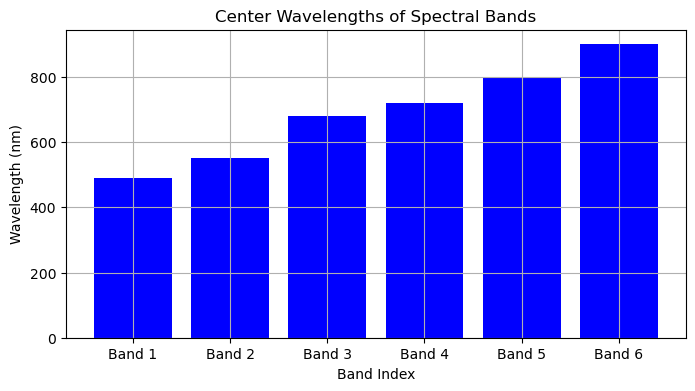

In [2]:
import matplotlib.pyplot as plt

# Spectral band centers in nanometers
band_centers = [490, 550, 680, 720, 800, 900]

# Plot each spectral band center
plt.figure(figsize=(8, 4))
plt.bar(range(len(band_centers)), band_centers, color='b')
plt.xlabel('Band Index')
plt.ylabel('Wavelength (nm)')
plt.title('Center Wavelengths of Spectral Bands')
plt.xticks(range(len(band_centers)), ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6'])
plt.grid(True)
plt.show()

C:\Users\siddaraja naik\anaconda3\Lib\site-packages\skimage\_shared\utils.py:326: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


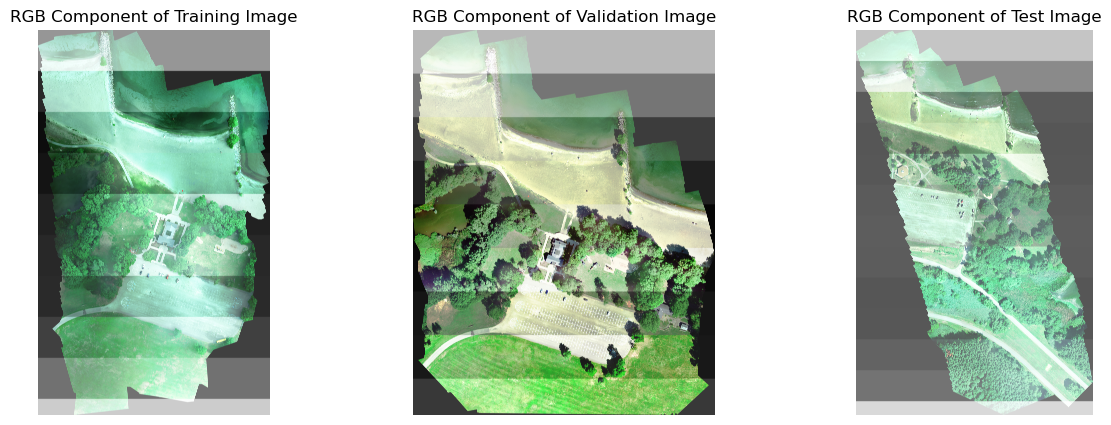

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.util import montage

# Function to equalize histogram for RGB images in batches
def equalize_hist_batch(image_data, batch_size=1000):
    num_batches = (image_data.shape[0] + batch_size - 1) // batch_size
    equalized_images = []
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, image_data.shape[0])
        batch = image_data[start_idx:end_idx, :, :]
        equalized_batch = exposure.equalize_hist(batch)
        equalized_images.append(equalized_batch)
    return np.vstack(equalized_images)

# Apply histogram equalization to RGB channels for train_data
rgbTrain = equalize_hist_batch(train_data[:, :, [2, 1, 0]])

# Apply histogram equalization to RGB channels for val_data
rgbVal = equalize_hist_batch(val_data[:, :, [2, 1, 0]])

# Apply histogram equalization to RGB channels for test_data
rgbTest = equalize_hist_batch(test_data[:, :, [2, 1, 0]])

# Display the RGB images separately
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rgbTrain)
axes[0].set_title('RGB Component of Training Image')

axes[1].imshow(rgbVal)
axes[1].set_title('RGB Component of Validation Image')

axes[2].imshow(rgbTest)
axes[2].set_title('RGB Component of Test Image')

for ax in axes:
    ax.axis('off')

plt.show()


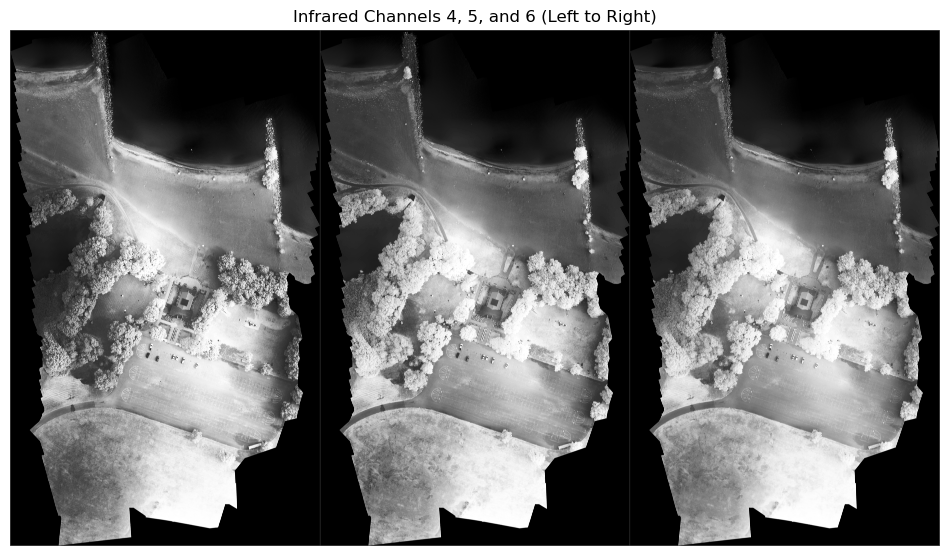

In [4]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.util import montage

# Apply histogram equalization to near-infrared channels for train_data
ir4Train = exposure.equalize_hist(train_data[:, :, 3])
ir5Train = exposure.equalize_hist(train_data[:, :, 4])
ir6Train = exposure.equalize_hist(train_data[:, :, 5])

# Display the montage of infrared channels
fig, ax = plt.subplots(figsize=(12, 8))
montage_ir = montage([ir4Train, ir5Train, ir6Train], grid_shape=(1, 3), padding_width=10)
ax.imshow(montage_ir, cmap='gray')  # Using grayscale colormap for infrared channels
ax.set_title('Infrared Channels 4, 5, and 6 (Left to Right)')
plt.axis('off')
plt.show()

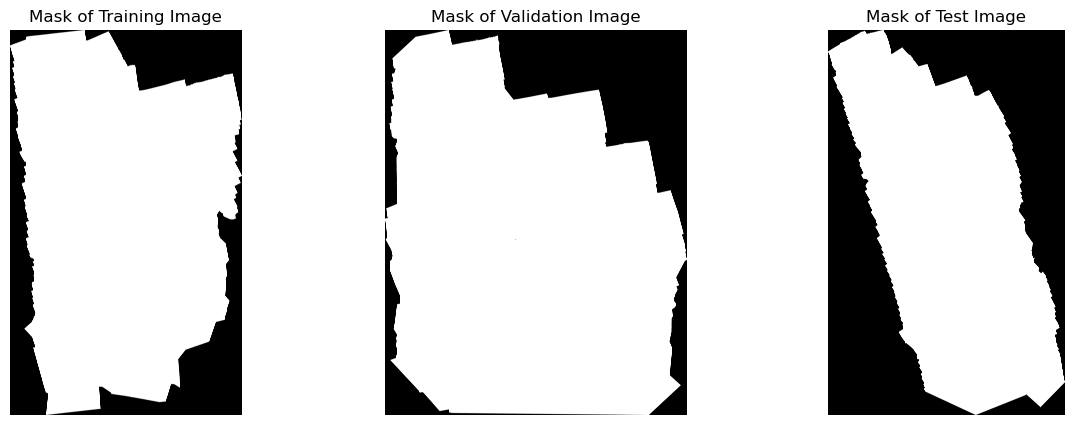

In [6]:
# Extract the mask from the data
maskTrain = train_data[:, :, 6]
maskVal = val_data[:, :, 6]
maskTest = test_data[:, :, 6]

# Display the masks
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(maskTrain, cmap='gray')
axes[0].set_title('Mask of Training Image')

axes[1].imshow(maskVal, cmap='gray')
axes[1].set_title('Mask of Validation Image')

axes[2].imshow(maskTest, cmap='gray')
axes[2].set_title('Mask of Test Image')

for ax in axes:
    ax.axis('off')

plt.show()


In [8]:
classes = data['classes']
for class_info in classes:
    class_id, class_name = class_info.split('. ')[0], class_info.split('. ')[1]
    print(f"Class ID: {class_id}, Class Name: {class_name}")

Class ID: 0, Class Name: Other Class/Image Border      
Class ID: 1, Class Name: Road Markings                 
Class ID: 2, Class Name: Tree                          
Class ID: 3, Class Name: Building                      
Class ID: 4, Class Name: Vehicle (Car, Truck, or Bus)  
Class ID: 5, Class Name: Person                        
Class ID: 6, Class Name: Lifeguard Chair               
Class ID: 7, Class Name: Picnic Table                  
Class ID: 8, Class Name: Black Wood Panel              
Class ID: 9, Class Name: White Wood Panel              
Class ID: 10, Class Name: Orange Landing Pad           
Class ID: 11, Class Name: Water Buoy                   
Class ID: 12, Class Name: Rocks                        
Class ID: 13, Class Name: Other Vegetation             
Class ID: 14, Class Name: Grass                        
Class ID: 15, Class Name: Sand                         
Class ID: 16, Class Name: Water (Lake)                 
Class ID: 17, Class Name: Water (Pond)          

C:\Users\siddaraja naik\AppData\Local\Temp\ipykernel_6960\4100324855.py:24: UserWarning: gtruth.png is a low contrast image
  imsave("gtruth.png", labelsVal)


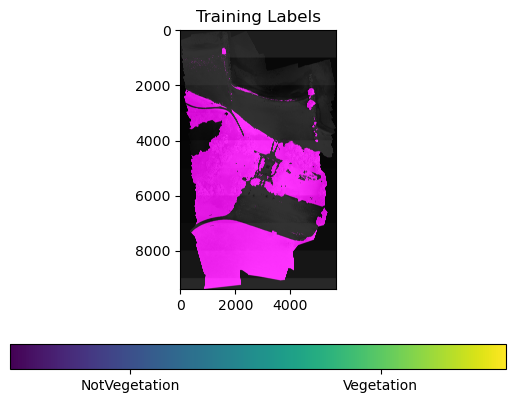

In [13]:
import numpy as np
from skimage.io import imsave
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Define target class names and IDs
classNames = ["NotVegetation", "Vegetation"]
vegetationClassIDs = [2, 13, 14]

# Assuming classes is the list of all class names and IDs
nonvegetationClassIDs = set(range(len(classes))) - set(vegetationClassIDs)

# Assign labels to training and validation data
labelsTrain = np.zeros_like(data['train_labels'], dtype=np.uint8)
labelsTrain[np.isin(data['train_labels'], nonvegetationClassIDs)] = 1
labelsTrain[np.isin(data['train_labels'], vegetationClassIDs)] = 2

labelsVal = np.zeros_like(data['val_labels'], dtype=np.uint8)
labelsVal[np.isin(data['val_labels'], nonvegetationClassIDs)] = 1
labelsVal[np.isin(data['val_labels'], vegetationClassIDs)] = 2


# Save the ground truth validation labels as a PNG file
imsave("gtruth.png", labelsVal)

# Overlay labels on the histogram-equalized RGB training image
cmap = np.array([[1, 0, 1], [0, 1, 0]])
overlay = label2rgb(labelsTrain, image=rgbTrain, bg_label=0, colors=cmap, alpha=0.8)

# Display the overlay image with color bar
plt.imshow(overlay)
plt.title("Training Labels")
numClasses = len(classNames)
ticks = np.linspace(0, 1, numClasses + 1)[1:] - 1 / (numClasses * 2)
cbar = plt.colorbar(orientation='horizontal')
cbar.set_ticks(ticks)
cbar.set_ticklabels(classNames)
plt.show()



In [14]:
import os
import tempfile
import requests
from zipfile import ZipFile

# Define the URL for the pretrained U-Net network
trainedNet_url = "https://ssd.mathworks.com/supportfiles/vision/data/trainedMultispectralUnetModel_v2.zip"

# Define the directory to save the downloaded file and extracted contents
data_dir = os.path.join(tempfile.gettempdir(), "rit18_data")
os.makedirs(data_dir, exist_ok=True)

# Download the pretrained U-Net network
response = requests.get(trainedNet_url)
downloaded_file_path = os.path.join(data_dir, "trainedMultispectralUnetModel_v2.zip")
with open(downloaded_file_path, "wb") as file:
    file.write(response.content)

# Extract the contents of the downloaded ZIP file
with ZipFile(downloaded_file_path, "r") as zip_ref:
    zip_ref.extractall(data_dir)

# Load the pretrained U-Net model
pretrained_model_path = os.path.join(data_dir, "trainedMultispectralUnetModel", "trainedMultispectralUnetModel_v2.mat")


In [19]:
from skimage.util import view_as_blocks
import numpy as np

# Define patch size for blocking
patch_size = (256, 256, 6)  # Three dimensions for height, width, and spectral channels

# Calculate the number of blocks along each dimension
num_blocks_height = test_data.shape[0] // patch_size[0]
num_blocks_width = test_data.shape[1] // patch_size[1]
num_blocks_spectral = 6

# Create an empty array to store blocks
blocks = np.zeros((num_blocks_height, num_blocks_width, num_blocks_spectral, patch_size[0], patch_size[1]))

# Populate the blocks array
for i in range(num_blocks_height):
    for j in range(num_blocks_width):
        for k in range(num_blocks_spectral):
            blocks[i, j, k] = test_data[i*patch_size[0]:(i+1)*patch_size[0], j*patch_size[1]:(j+1)*patch_size[1], k]

# Now you have the blocks array containing blocks of size (256, 256, 6)
# Perform semantic segmentation on each block as needed


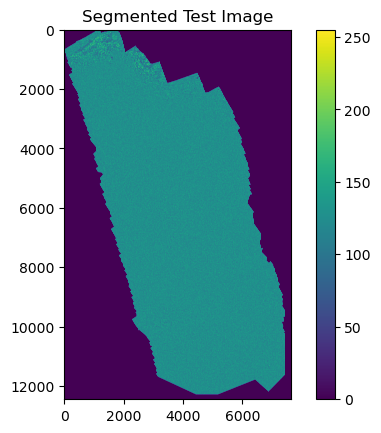

In [22]:
# Assuming you have performed semantic segmentation and stored the segmented blocks in 'segmented_blocks'
# Now gather the segmented blocks into a single image
segmented_image = np.zeros_like(test_data[:, :, 0], dtype=np.uint8)
block_height, block_width, _, _, _ = blocks.shape

# Reshape the segmented blocks to a single image
for i in range(block_height):
    for j in range(block_width):
        # Replace 'segmented_blocks' with the actual variable containing the segmented blocks
        segmented_image[i*patch_size[0]:(i+1)*patch_size[0], j*patch_size[1]:(j+1)*patch_size[1]] = blocks[i, j]

# Visualize the segmented image
plt.imshow(segmented_image, cmap='viridis')  # Adjust the colormap as needed
plt.title('Segmented Test Image')
plt.colorbar()
plt.show()


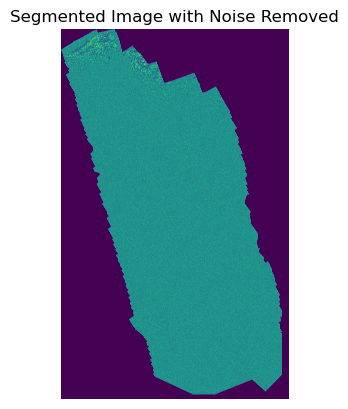

In [23]:
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

# Apply median filtering to remove noise from the segmented image
segmented_image_filtered = median_filter(segmented_image, size=(7, 7))

# Display the segmented image with noise removed
plt.imshow(segmented_image_filtered, cmap='viridis')  # Adjust the colormap as needed
plt.title('Segmented Image with Noise Removed')
plt.axis('off')
plt.show()


In [24]:
# Flatten the segmented image and count the number of vegetation pixels
vegetation_pixels = np.isin(segmented_image.flatten(), vegetationClassIDs)
num_vegetation_pixels = np.sum(vegetation_pixels)

# Count the total number of pixels in the ROI
num_roi_pixels = np.count_nonzero(segmented_image)

# Calculate the percentage of vegetation cover
percent_vegetation_cover = (num_vegetation_pixels / num_roi_pixels) * 100

print("The percentage of vegetation cover is {:.4f}%".format(percent_vegetation_cover))


The percentage of vegetation cover is 1.1744%
